# Практическая работа 1

## Тема: геометрические преобразования и монокулярное зрение

### Задачи: 
* знакомство с python, numpy, jupyter, matplotlib и проч.
* применение пройденных геометрических преобразований
* применение законов центральной проекции
* применение обратного проецирования с априорными знаниями
* ???

### Prerequirements 
* интерпретатор python 2.7.xx
* библиотеки numpy, matplotlib, scipy

## 1. Движения
Для начала сгенерируем точки которые будем двигать.

In [276]:
import numpy.random
import matplotlib.pyplot as plt

### Задача 1.1
Напишите функцию для генерации 3хмерных точек:

In [277]:
def generate_3d_points(N):
    return np.random.multivariate_normal(np.zeros(3), np.eye(3), N)

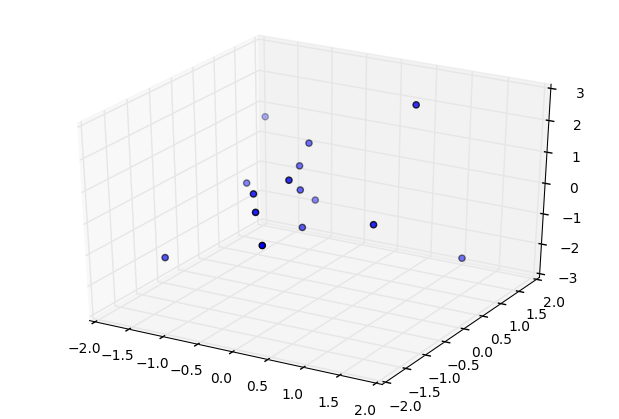

In [278]:
f = plt.figure()
from mpl_toolkits import mplot3d
ax = mplot3d.Axes3D(f)

points3D = generate_3d_points(15)
ax.scatter(points3D[:, 0], points3D[:, 1], points3D[:, 2])

Теперь попробуем повернуть наше облако точек:

In [279]:
def rot_matrix(angles):
    cos = [np.math.cos(a) for a in angles]
    sin = [np.math.sin(a) for a in angles]
    Rz = np.array([[cos[2], -sin[2], 0],
                   [sin[2], cos[2],  0],
                   [     0,      0,  1]])

    Ry = np.array([[ cos[1], 0, sin[1]],
                   [      0, 1,      0],
                   [-sin[1], 0, cos[1]]])

    Rx = np.array([[1,      0,       0],
                   [0, cos[0], -sin[0]],
                   [0, sin[0], cos[0]]])
    #Rs = [Rx, Ry, Rz]
    return Ry.dot(Rx).dot(Rz)

R = rot_matrix([np.pi / 6.0, 0, np.pi / 3.0])
print 'R = ', R
print '||R||_2 = ', np.linalg.norm(R, ord=2)
print '|R| = ', np.linalg.det(R)


R =  [[ 0.5       -0.8660254  0.       ]
 [ 0.75       0.4330127 -0.5      ]
 [ 0.4330127  0.25       0.8660254]]
||R||_2 =  1.0
|R| =  1.0


### Задача 1.2(*)
Напишите функцию, вычисляющую углы поворота из матрицы поворота


In [280]:
def rot_angles(m):
    return [math.atan2(m[2][1], m[1][1]),
            math.atan2(m[0][2], m[0][0]),
            math.atan2(-m[0][1], math.sqrt(pow(m[0][2],2) + pow(m[0][0], 2)))]
print rot_angles(R)
assert(np.allclose(rot_matrix(rot_angles(R)), R))

[0.5235987755982987, 0.0, 1.0471975511965976]


### Задача 1.3. применение движений к точкам
* Примените операцию поворота к массиву points3D.
* Добавьте к повороту смещение на вектор t=[0,10,0]

In [281]:
# поворот вставьте сюда. отобразите результат
def rotate(points, rot_mat):
    return np.array([rot_mat.dot(point) for point in points])

rotated_points = rotate(points3D, R)

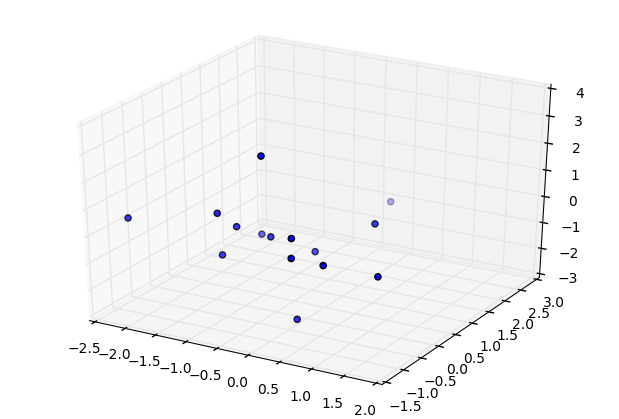

In [282]:
f = plt.figure()
ax = mplot3d.Axes3D(f)
ax.scatter(rotated_points[:, 0], rotated_points[:, 1], rotated_points[:, 2])

In [283]:
t = np.array([0.0, 10.0, 0.0])
# сдвиг вставьте сюда. отобразите результат
def translate(points, t):
    return np.array([point + t for point in points])

translated_points = translate(rotated_points, t)

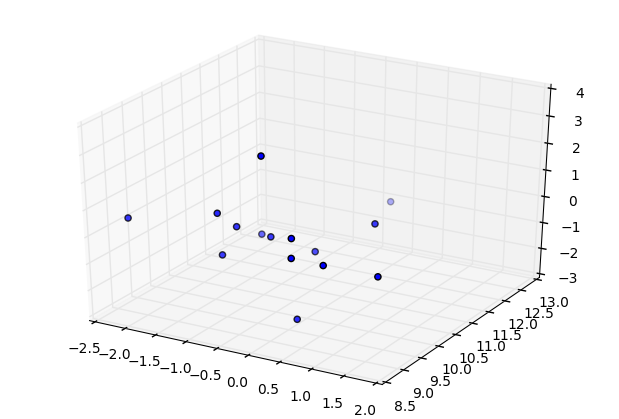

In [284]:
f = plt.figure()
ax = mplot3d.Axes3D(f)
ax.scatter(translated_points[:, 0], translated_points[:, 1], translated_points[:, 2])

Теперь перейдем к однородным координатам.
Используйте функцию 'np.hstack', чтобы присоединить единичку к векторам-точкам.

In [285]:
def make_homogenous(points):
    return np.hstack([points, np.ones(points.shape[0]).reshape(points.shape[0], 1)])

# вставьте движение точек с помощью однородных координат сюда. отобразите результат
def move(points, rot_mat, t):
    homogeneous_points = make_homogenous(points)
    homogeneous_mat = np.hstack([rot_mat, t.reshape(t.shape[0], 1)])
    return np.array([homogeneous_mat.dot(point) for point in homogeneous_points])

assert np.allclose(move(points3D, R, t), translated_points)

Мы научились обращаться с массивом точек, поворачивать, двигать его, переводить в однородные координаты. 
Если в обозначенных функциях вы пользовались циклами, постарайтесь обойтись без них.

## 2. Проективное преобразование
### Задача 2.4
* Сгенерируйте 4 двумерные точки в общем положении
* Сгенерируйте случайное проективное преобразовани
* Преобразуйте точки этим проективным преобразованием и отобразите на одном plot результаты до\после

In [286]:
%matplotlib inline

In [287]:
def make_normal(points):
    return np.array([[p[0]/p[2], p[1]/p[2]] for p in points])

def transform(points, mat):
    homogeneous_points = make_homogenous(points)
    homogeneous_mat = np.hstack([mat, t.reshape(t.shape[0], 1)])
    return make_normal(np.array([mat.dot(point) for point in homogeneous_points]))


[[-0.44035945 -0.45585221]
 [ 0.30336257  1.03825259]
 [-0.08879105 -1.49449519]
 [ 1.08915909  0.95624336]]


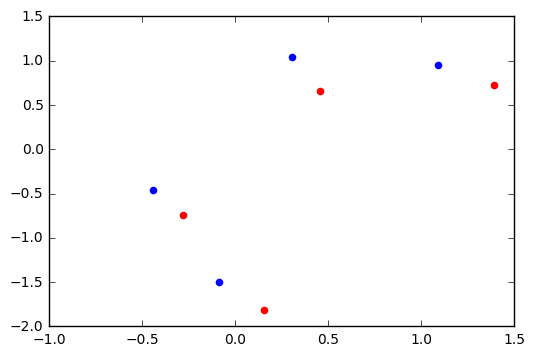

In [289]:
points = np.random.multivariate_normal(np.zeros(2), np.eye(2), 4)
print points
if (False):
    transform_mtx = np.random.rand(3, 3)
else:
    transform_mtx = np.array([[1.2,-0.04,0.2],[0.12,1,-0.32],[-0.1,0.07,1.1]])
transformed_points = transform(points, transform_mtx)
plt.scatter(points[:,0], points[:,1], color='b')
plt.scatter(transformed_points[:,0], transformed_points[:,1], color='r')

### Задача 2.5(*)
Сгенерируйте 4 точки в общем положении. Вычислите проективное преобразование переводящее их в 
а) прямоугольник
б) квадрат

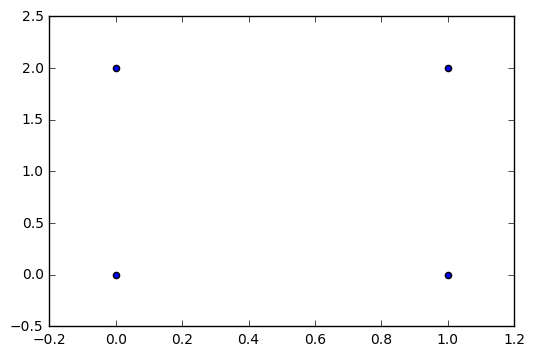

In [290]:
# Consider 4 points stored in 'points'
x=1 # Rect coordinates
y=2 # y=x for square case
rect_points = np.array([[0,0], [x,0],[x,y],[0,y]])
A_mat = np.array([
        [0,0,0,0,-x,0,1,0,0],
        [-x,0,0,0,0,0,points[1][0],0,0],
        [0,0,-x,0,0,0,points[1][1],0,0],
        [-x,-y,0,0,0,0,0,points[2][0],0],
        [0,0,-x,-y,0,0,0,points[2][1],0],
        [0,0,0,0,-x,-y,0,1,0],
        [0,-y,0,0,0,0,0,0,points[3][0]],
        [0,0,0,-y,0,0,0,0,points[3][1]],
        [0,0,0,0,0,-y,0,0,1]])
b = [1,points[0][0], points[0][1], points[0][0], points[0][1], 1, points[0][0], points[0][1], 1]
s = np.linalg.solve(A_mat, b)[:6] # need only a11 a12 a21...a32
rect_to_points_mtx = np.array([[s[0],s[1],points[0][0]],[s[2],s[3],points[0][1]], [s[4],s[5],1]])

transformed_rect = transform(rect_points, rect_to_points_mtx)
assert np.allclose(transformed_rect, points)
# Now to get transform from rand points to rect points let's apply inversioin
needed_mtx = np.linalg.inv(rect_to_points_mtx)
transformed_rand_points = transform(points, needed_mtx)
assert np.allclose(rect_points, transformed_rand_points)

plt.scatter(transformed_rand_points[:,0], transformed_rand_points[:,1])

## 3. Центральная проекция. Матрица камеры
В этой части практической работы мы будем работать с камерой.
Наши трехмерные точки, сгенерированный в первой части мы будем проецировать на изображение камеры и отображать.

In [301]:
from exceptions import ValueError

class Camera:
    '''Pinhole camera projection'''
    def __init__(self, R, t, K, size):
        # вставьте сюда проверку размеров и того что R - матрица поворота.
        if  not (t.shape == (3L,) and R.shape == (3, 3) and K.shape == (3,3)):
            raise ValueError('bad constructor args')
        self.R = R
        self.t = t
        self.K = K
        self.size = size
        # self.P = np.
        self.P = K.dot(np.hstack([R, t.reshape(t.shape[0], 1)]))
    
    def project(self, points):
        if points.shape[1] == 3:
            homo_pts = self.K.dot(translate(rotate(points, self.R), self.t).T).T
        elif points.shape[1] == 4:
            homo_pts = self.P.dot(points.T)
        else:
            raise ValueError('Incorrect points size for Camera.project: %s' % \
                             str(points.shape))
        return homo_pts[:, : 2] / homo_pts[:, 2].reshape(-1, 1)

### Задача 3.6
Поместите камеру так, чтобы все точки были спереди камеры.
Спроецируйте точки и отобразите средствами matplotlib (используйте функцию plt.scatter).


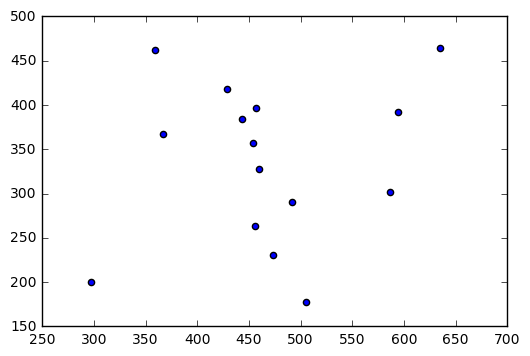

In [302]:
# решение задачи 3.6
K = np.array([[9.842439e+02, 0.000000e+00, 6.900000e+02],
              [0.000000e+00, 9.808141e+02, 2.331966e+02],
              [0.000000e+00, 0.000000e+00, 1.000000e+00]], dtype='float64')
R = np.eye(3, dtype='float64')
t = np.array([-2, 1, 10], dtype='float64') # продобрать t используя статистики по Points
img_size = (600, 800)
cam = Camera(R=R, t=t, K=K, size=img_size)

# дебаг-проверка
# points3D = np.random.uniform(low=2,high=3,size=(10,3))

projected_pts = cam.project(points3D)
plt.scatter(projected_pts[:,0], projected_pts[:,1])

## 4. Работа с изображениями
Дискетные изображения - 3х-мерные массивы чисел.
Две координаты отвечают за пространственное положение пикселя, третья - за канал. 
Нумеровать измерения изображений могут по-разному, обычно это либо (ch, y, x), либо (y, x, ch). 
Один из наиболее частых типов изображения - 3х канальные восьмибитные.
В библиотеке OpenCV такой тип обозначается CV_8UC3.
Значения элементов такого изображения имеют тип uint8 (или unsigned char в C\C++) - по 256 градаций на каждый канал.


В Python есть различные библиотеки по работе с изображениями - PIL, OpenCV, Scikit-image, scipy.ndimage.
Все они представляют изображение в виде numpy.array

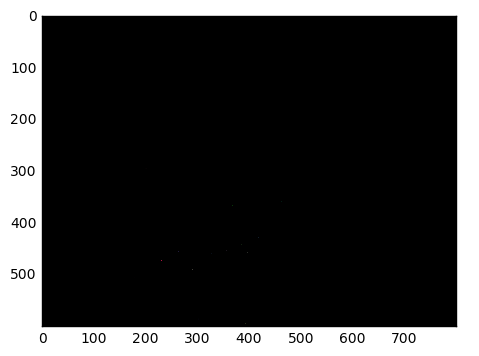

In [303]:
# попробуем создать пиксельное изображение с нашей камеры и отобразить точки на нем.
img = np.zeros(shape=(img_size[0], img_size[1], 3), dtype='uint8')

img_pts = projected_pts.astype('int') # переводим к целым координатам пикселей
# выделим только те точки, которые попадают в изображение
img_pts = img_pts[(img_pts[:, 0] >= 0) & (img_pts[:, 1] >= 0) & 
                  (img_pts[:, 0] < img_size[0]) & (img_pts[:, 1] < img_size[1])]

colors = np.random.uniform(0, 256, size=(img_pts.shape[0], 3)).astype('uint8')
img[img_pts[:, 0], img_pts[:, 1], :] = colors
plt.imshow(img) # вот так можно отобразить получившееся изображение
plt.show()


Итак, мы научились работать с растровыми изображениями.
Теперь попробуем применить наши знания к реальным данным.
В директории ../data/ вы можете найти изображение и облако точек, полученное с лидара - лазерного сканера, определяющее расстояния до точек в некотором телесном угле.
Изображение и точки взяты из общедоступного датасета KITTI (http://www.cvlibs.net/datasets/kitti/)

### Задача 4.6
Отобразить точки с лидара на изображении.

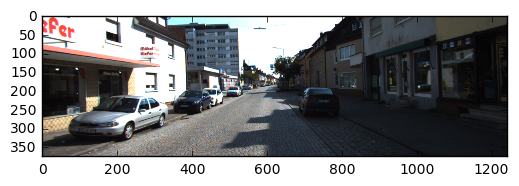

In [304]:
# взглянем на данные.
# изображение
import scipy.ndimage
image = scipy.ndimage.imread('../data/kitti_test_image.png')
plt.imshow(image)
plt.show()

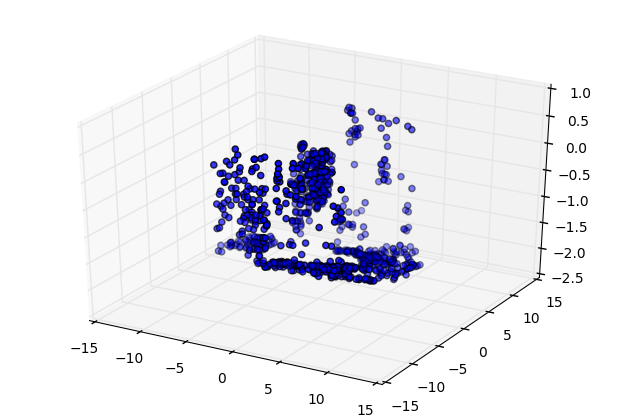

In [305]:
# точки с лидара
points = np.load('../data/points.npy')
f = plt.figure()
ax = mplot3d.Axes3D(f)
pts = points[np.random.randint(0, points.shape[0], 1000), :] # отобразим только часть точек, чтобы не было тормозов
ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2])
plt.show()

Для успешного решения задачи необходимы параметры камеры и взаимной установки камеры и лидара.
Эта информация приводится в датасете KITTI.
Для простоты здесь будет все что нужно.

In [306]:
K = np.array([[9.597910e+02, 0.000000e+00, 6.960217e+02],
              [0.000000e+00, 9.569251e+02, 2.241806e+02],
              [0.000000e+00, 0.000000e+00, 1.000000e+00]], 
             dtype='float64')
# to_lidar transform,  вам нужно обратное.
R_to_lidar = np.array([[7.533745e-03, -9.999714e-01, -6.166020e-04],
                           [1.480249e-02,  7.280733e-04, -9.998902e-01],
                           [9.998621e-01,  7.523790e-03,  1.480755e-02]],
                          dtype='float64')
t_to_lidar = np.array([-4.069766e-03, -7.631618e-02, -2.717806e-01],
                          dtype='float64')

#камера расположена немного левее начала с.к.
R_cam = np.ones((3,3), dtype='float64')
t_cam = np.array([5.956621e-02, 2.900141e-04, 2.577209e-03],
                 dtype='float64')
img_size = image.shape

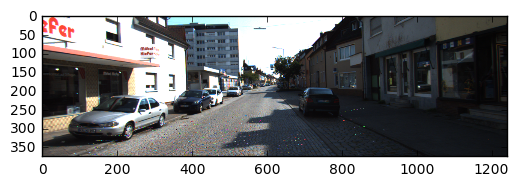

In [311]:
# отображение точек с лидара pts на изображение image.
R_from_lidar = np.linalg.inv(R_to_lidar)
t_from_lidar = -t_to_lidar
cam = Camera(R=R_from_lidar, t=t_from_lidar, K=K, size=img_size)

projected_pts = cam.project(points)
projected_pts = np.round(projected_pts).astype(int)

on_img = np.array([pt for pt in projected_pts if (pt[0] >=0 and pt[0] < img_size[0] and pt[1] >=0 and pt[1] < img_size[1])])

colors = np.random.uniform(0, 256, size=(on_img.shape[0], 3)).astype('uint8')
image[on_img[:, 0], on_img[:, 1], :] = colors
plt.imshow(image)
plt.show()

## Заключение
Поздравляю, вы завершили выполнение практической работы номер 1. - Геометрия и центральная проекция.
Надеюсь, вам было так же интересно выполнять задание как и мне его составлять.

Чтобы сдать задание можно
1) сделать fork репозитория
2) создать бранч с названием-вашей фамилией
3) закоммитить и сделать pull request.

или просто прислать выполненный .ipynb файл мне на емейл vicproon [at] gmail.
(лучше пулл реквест, так как я хочу посмотреть, как это будет работать для студенческих заданий).

Если вы нашли ошибку в коде или хотите что-то улучшить, можете так же сделать пулл реквест с понятным именем бранча.